In [1]:
datapath='/Volumes/LaCie/CMIP6/Ecolight/ssp126/'
import os
listing = sorted(os.listdir(f'{datapath}'))


In [19]:
import glob



In [4]:
import pathlib
files=list(pathlib.Path(datapath).glob('*.nc'))

In [5]:
files[0]

PosixPath('/Volumes/LaCie/CMIP6/Ecolight/ssp126/CESM2_ssp126_r11i1p1f1_gn_201_PAR_April.nc')

In [6]:
files=sorted(files)

In [7]:
files[0]

PosixPath('/Volumes/LaCie/CMIP6/Ecolight/ssp126/ACCESS-CM2_ssp126_r1i1p1f1_gn_PAR_April_2015.nc')

In [9]:
import netCDF4 as nc
from netCDF4 import Dataset, num2date


In [10]:
ncf=nc.Dataset(files[0])


In [11]:
ncf

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): time(86), x(361), y(361)
    variables(dimensions): float64 par(time,x,y), float32 lon(x,y), float32 lat(x,y), int64 time(time)
    groups: 

In [13]:
import xarray as xr
DS = xr.open_dataset(files[0])

In [14]:
DS


<xarray.Dataset>
Dimensions:  (time: 86, x: 361, y: 361)
Coordinates:
    lon      (x, y) float32 ...
    lat      (x, y) float32 ...
  * time     (time) datetime64[ns] 2015-04-16 2016-04-16 ... 2100-04-16
Dimensions without coordinates: x, y
Data variables:
    par      (time, x, y) float64 ...

In [15]:
par=DS.values

In [18]:
par

<bound method Mapping.values of <xarray.Dataset>
Dimensions:  (time: 86, x: 361, y: 361)
Coordinates:
    lon      (x, y) float32 ...
    lat      (x, y) float32 ...
  * time     (time) datetime64[ns] 2015-04-16 2016-04-16 ... 2100-04-16
Dimensions without coordinates: x, y
Data variables:
    par      (time, x, y) float64 ...>

/Users/stroeve/opt/anaconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:385: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


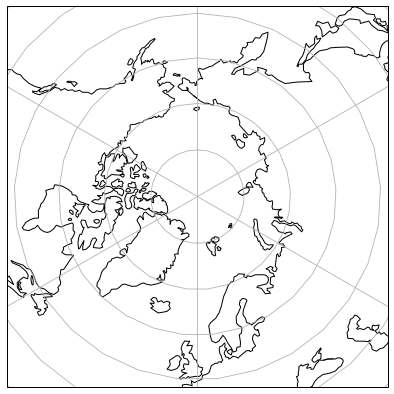

In [20]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
SphericalEarth = ccrs.Globe(semimajor_axis=6371228., semiminor_axis=6371228.)
NSIDC_EASE = ccrs.LambertAzimuthalEqualArea(central_latitude=90., central_longitude=0., globe=SphericalEarth)

extent = [-4524683.8, 4524683.8, -4524683.8, 4524683.8]
fig=plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection=NSIDC_EASE)
ax.set_extent(extent, NSIDC_EASE)
ax.coastlines()
ax.gridlines()

In [26]:
par_one=DS.sel(time='2015-04-16')


In [32]:
par_one

<xarray.Dataset>
Dimensions:  (x: 361, y: 361)
Coordinates:
    lon      (x, y) float32 ...
    lat      (x, y) float32 ...
    time     datetime64[ns] 2015-04-16
Dimensions without coordinates: x, y
Data variables:
    par      (x, y) float64 ...

In [33]:
par=par_one.values

In [35]:
par


<bound method Mapping.values of <xarray.Dataset>
Dimensions:  (x: 361, y: 361)
Coordinates:
    lon      (x, y) float32 ...
    lat      (x, y) float32 ...
    time     datetime64[ns] 2015-04-16
Dimensions without coordinates: x, y
Data variables:
    par      (x, y) float64 ...>

In [36]:
par.plot()


AttributeError: 'function' object has no attribute 'plot'

In [38]:
par_one.plot(ax=ax)


ValueError: Dataset.plot cannot be called directly. Use an explicit plot method, e.g. ds.plot.scatter(...)